In [1]:
import gseapy as gp
import numpy as np

from pathlib import Path
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams["pdf.fonttype"] = 42

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

DPI = 300
FONTSIZE = 20  # 42

In [2]:
SAMPLE_NAME =  "concat_withWu2022" 

In [3]:
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/microenvs_geneexp")

In [4]:
# figures
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [5]:
genes_df = pd.read_excel(
    DIR2SAVE.joinpath(f"{SAMPLE_NAME}_DE_microenvs.xlsx"), 
    header=0,
)

In [6]:
#load ganesh signaatures
hotspot = pd.read_excel('/data/BCI-CRC/SO/data/public/MoormanGanesh2024_CRC_scRNAseq/2023-07-12062C-Supplementary_Table_4.xlsx', skiprows=[0])
hotspot.head(2)

,Unnamed: 0,Module,Annotation,Kept
0,REG1A,3,Absorptive Intestine,True
1,CCL25,3,Absorptive Intestine,True


In [9]:
### Dictionary of genes for each annotation
hotspot_dict = hotspot.groupby("Annotation")["Unnamed: 0"].apply(list).to_dict()

In [10]:
#load ganesh signaatures
### list of 1st trimester DEGs
fetal_DEGs = list(pd.read_excel('/data/BCI-CRC/SO/data/public/MoormanGanesh2024_CRC_scRNAseq/2023-07-12062C-Supplementary_Table_5.xlsx', skiprows=[0]).iloc[:,0])
hotspot_dict['Fetal'] = fetal_DEGs

### enrichment analysis

In [11]:
geneset2use = hotspot_dict

In [12]:
enr_dict = dict()

for i in genes_df.columns:
    #table2look = svg_byregion[svg_byregion.segmentation_label==i].sort_values(ascending=True, by="padj", axis=0)
    #gene2look = table2look.gene[:300]
    gene2look = genes_df[i].dropna() #.values.tolist()
    
    enr = gp.enrichr(gene_list=gene2look, 
                     gene_sets=geneset2use, 
                     organism="Human",
                     outdir=None,
                     #cutoff=0.05,
                    )
    enr_dict[i] = enr.results

In [13]:
enr_dict

{'0':                 Gene_set                  Term Overlap       P-value  \
 0   CUSTOM47153632160704  Absorptive Intestine    1/68  6.510228e-01   
 1   CUSTOM47153632160704                 Cilia    1/82  7.191580e-01   
 2   CUSTOM47153632160704                   EMT  20/213  1.147153e-10   
 3   CUSTOM47153632160704  Endoderm Development    3/42  2.639125e-02   
 4   CUSTOM47153632160704                 Fetal  11/105  6.347209e-07   
 5   CUSTOM47153632160704         Injury Repair  18/135  2.753653e-12   
 6   CUSTOM47153632160704             Intestine    2/57  2.176179e-01   
 7   CUSTOM47153632160704             Leukocyte  22/134  1.060662e-16   
 8   CUSTOM47153632160704        Neuroendocrine   7/138  5.462537e-03   
 9   CUSTOM47153632160704            Osteoblast    2/74  3.141564e-01   
 10  CUSTOM47153632160704   Secretory Intestine    5/85  9.917365e-03   
 11  CUSTOM47153632160704              Squamous   8/260  4.779994e-02   
 12  CUSTOM47153632160704                Stres

In [15]:
enr_dict['0']

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes
0,CUSTOM47153632160704,Absorptive Intestine,1/68,6.510228e-01,7.011015e-01,1.425311,HOPX
1,CUSTOM47153632160704,Cilia,1/82,7.191580e-01,7.191580e-01,1.182567,IGFBP7
2,CUSTOM47153632160704,EMT,20/213,1.147153e-10,4.015036e-10,6.634454,SERPINE1;IGFBP5;TNC;INHBA;VIM;ITGA5;VCAN;COL5A...
3,CUSTOM47153632160704,Endoderm Development,3/42,2.639125e-02,4.105306e-02,5.404714,CAPN6;TGFBI;COL1A1
4,CUSTOM47153632160704,Fetal,11/105,6.347209e-07,1.777219e-06,7.332747,GPX8;CMTM3;PXDN;FLNA;NOTCH3;PDLIM7;F2R;FSTL1;F...
5,CUSTOM47153632160704,Injury Repair,18/135,2.753653e-12,1.285038e-11,9.403753,IGFBP6;COL4A2;SPOCK1;PLAT;PLAUR;TYMP;LBH;FLNA;...
6,CUSTOM47153632160704,Intestine,2/57,2.176179e-01,2.769683e-01,2.841353,IFI30;TIMP3
7,CUSTOM47153632160704,Leukocyte,22/134,1.060662e-16,1.484927e-15,11.693030,CXCR4;CD248;MNDA;S100A8;SLC2A3;FCGR3A;PLXNC1;C...
8,CUSTOM47153632160704,Neuroendocrine,7/138,5.462537e-03,1.092507e-02,3.585482,NTM;SUSD2;EPHA3;COL1A2;MMP2;DKK3;LOXL2
9,CUSTOM47153632160704,Osteoblast,2/74,3.141564e-01,3.665157e-01,2.191027,S1PR3;MXRA5


In [16]:
## Create dictionary of GO results for each Cell_subtype
### -1 * log10 results - na become 0.0 when sum later
pvalues = dict()

for i in enr_dict.keys():
    enr_dict[i].drop_duplicates(subset="Term", inplace=True)
    pvalues[i] = enr_dict[i][["Term","Adjusted P-value"]]
    pvalues[i] = pvalues[i].rename(columns={'Adjusted P-value': i})
    pvalues[i] = pvalues[i].set_index("Term")
    pvalues[i][i] = -np.log10(pvalues[i][i])
    print(pvalues[i].shape)



(14, 1)
(14, 1)
(11, 1)
(13, 1)
(13, 1)
(15, 1)
(16, 1)
(13, 1)
(7, 1)
(15, 1)


In [17]:
# cooncat pvalues to get a single dataframe with pathways + pvalues
minuslogp = pd.concat(pvalues.values(), join="outer", axis=1)
minuslogp.fillna(0, inplace=True)
minuslogp.shape

(16, 10)

In [18]:
# Test for significance at FDR < 0.05
minuslogp_bool = minuslogp <= -1 * np.log10(0.05)
# remove pathways that are not significant in both regions
# return True if all values in row are not significant, need to invert this later
minuslogp_bool = minuslogp_bool.all(axis=1) #.all() returns True if all items in list are True

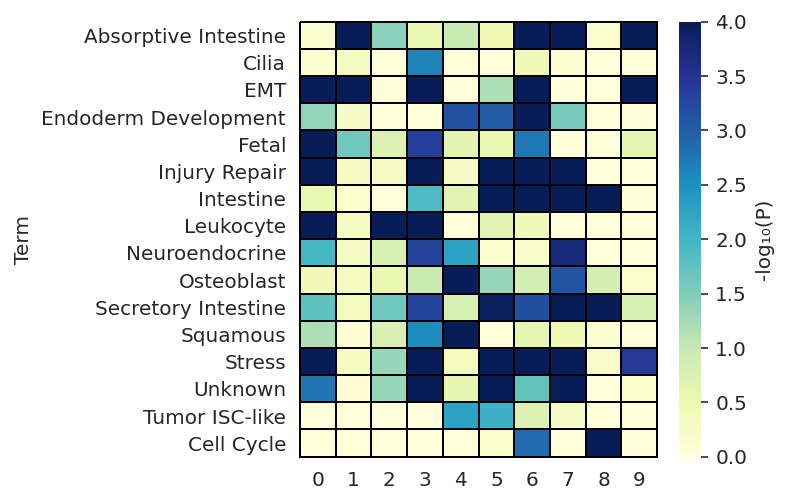

In [19]:
import seaborn as sns
plt.figure(figsize = (4,4))
#sns.heatmap(minuslogp.loc[GOtoplot, order_cat], vmax=4, cmap="viridis"
with sns.axes_style("white"):
    sns.heatmap(minuslogp[~minuslogp_bool],vmax=4, cmap="YlGnBu", linewidths=1, linecolor='black',
                clip_on=False,cbar_kws={'label': u'-log\u2081\u2080(P)'}) # vmax =4
    plt.savefig(
    f"{FIG2SAVE}/Karuna_GSEA_regions_{SAMPLE_NAME}_heatmap_no_ordering.pdf",
    dpi=DPI,
    bbox_inches="tight",
    facecolor='white')
    
    plt.show()

In [20]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/microenvs_geneexp/figures')

In [21]:
SAMPLE_NAME

'concat_withWu2022'